<a href="https://colab.research.google.com/github/LalithaHarini/Trend-and-seasonality/blob/main/Trend_and_seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

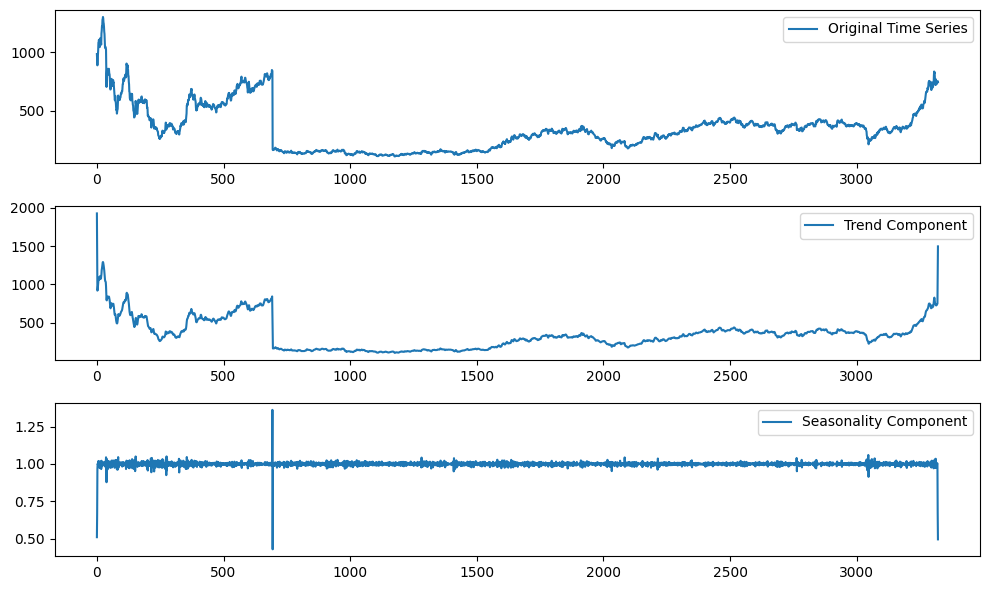

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
data = pd.read_csv("/content/ADANIPORTS.csv")

# Select only one column (replace 'ColumnName' with the actual column name)
y = data['VWAP']

def estimate_trend(y, d):
    n = len(y)
    trend = [0]*n
    for t in range(n):
        if d % 2 == 1:  # odd d
            sum_y = sum(y[max(0, t-d//2):min(n, t+d//2+1)])
            count = min(t+1, n-t, d)
        else:  # even d
            sum_y = sum(y[max(0, t-d//2+1):min(n, t+d//2+1)])
            count = min(t+1, n-t, d)
        trend[t] = sum_y / count
    return trend

def estimate_seasonality(y, d, trend):
    n = len(y)
    seasonality = [0]*n
    for t in range(n):
        seasonality[t] = y[t]/trend[t]
    return seasonality




if len(y)%2==0:
  d = 3
else:
  d = 4

trend = estimate_trend(y, d)
seasonality = estimate_seasonality(y, d, trend)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(y, label='Original Time Series')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(trend, label='Trend Component')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(seasonality, label='Seasonality Component')
plt.legend()

plt.tight_layout()
plt.show()

